# Features

#### Marital Status
Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.

#### Nationality
United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), 
India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, 
Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, 
Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.




In [193]:
import numpy as np
import pandas as pd

data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data",header=None)
data.columns = ['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','salary-class']
nation = data['native-country']
nationCount = nation.value_counts()
married = data['marital-status']
marriedCount = married.value_counts()
label = data['salary-class']
labelCount = label.value_counts()

# Plotting Marital Status

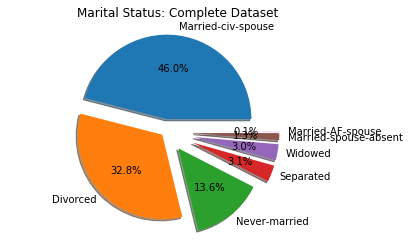

In [132]:
import matplotlib.pyplot as plt

#Plotting complete dataset
labels = 'Married-civ-spouse', 'Divorced', 'Never-married', 'Separated', 'Widowed', 'Married-spouse-absent', 'Married-AF-spouse'
sizes = [marriedCount[0],marriedCount[1],marriedCount[2],marriedCount[3],marriedCount[4],marriedCount[5],
          marriedCount[6]]
explode = (0.15, 0.05, 0.25, 0.35, 0.35, 0.35, 0.35)  # explode 1st slice
 
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=0)

plt.title('Marital Status: Complete Dataset')
plt.axis('equal')
plt.show()


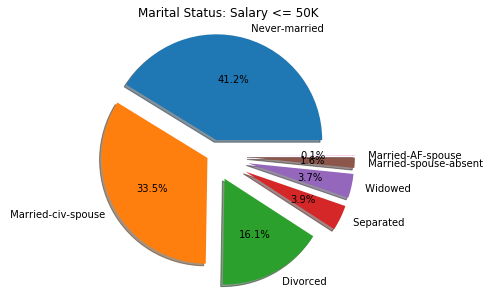

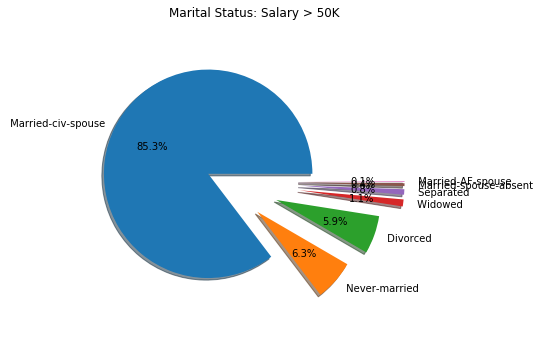

In [272]:
from collections import Counter
import matplotlib.pyplot as plt

#Plot with regards to salary ==> <=$50K, >$50K
marriedBelow = list()
marriedAbove = list()
for idx, x in enumerate(married):
    if label[idx].strip() == '<=50K':
        marriedBelow.append(x)
    else:
        marriedAbove.append(x)

marriedBelowCount = Counter(marriedBelow).most_common()
marriedAboveCount = Counter(marriedAbove).most_common()


labels1 = [item for item, _ in marriedBelowCount]
sizes1 = [count for _ , count in marriedBelowCount]
labels2 = [item for item, _ in marriedAboveCount]
sizes2 = [count for _ , count in marriedAboveCount]
explode1 = (0.15, 0.05, 0.25, 0.35, 0.35, 0.35, 0.35)  
explode2 = (0.15, 0.45, 0.55, 0.75, 0.75, 0.75, 0.75)  
plt.figure(figsize=(5,5))
plt.pie(sizes1, explode=explode1, labels=labels1, autopct='%1.1f%%', shadow=True, startangle=0)
plt.title('Marital Status: Salary <= 50K')
plt.axis('equal')
plt.figure(figsize=(5,5))
plt.pie(sizes2, explode=explode2, labels=labels2, autopct='%1.1f%%', shadow=True, startangle=0)
plt.title('Marital Status: Salary > 50K')
plt.tight_layout()
plt.axis('equal')
plt.show()

# Plotting Nationality

In [271]:
from geopy.geocoders import Nominatim
geolocator = Nominatim()

nations = list(['United-States', 'Cambodia', 'England', 'Puerto Rico', 'Canada', 'Germany', 'Guam', 'India', 'Japan', 'Greece', 'South', 'China', 'Cuba', 'Iran', 'Honduras', 'Philippines', 'Italy', 'Poland', 'Jamaica', 'Vietnam', 'Mexico', 'Portugal', 'Ireland', 'France', 'Dominican Republic', 'Laos', 'Ecuador', 'Taiwan', 'Haiti', 'Columbia', 'Hungary', 'Guatemala', 'Nicaragua', 'Scotland', 'Thailand', 'Yugoslavia', 'El Salvador', 'Trinidad and Tobago', 'Peru', 'Hong Kong', 'Holland'])
LatLon = list()
for loc in nations:
    location = geolocator.geocode(loc)
    print '%s: %s' % (loc, (location.latitude, location.longitude))
    LatLon.append((location.latitude, location.longitude))



United-States: (39.7837304, -100.4458825)
Cambodia: (13.5066394, 104.869423)
England: (52.7954791, -0.540240286617432)
Puerto Rico: (18.22141715, -66.4132818505648)
Canada: (61.0666922, -107.9917071)
Germany: (51.0834196, 10.4234469)
Guam: (13.444138, 144.733626445767)
India: (22.3511148, 78.6677428)
Japan: (36.5748441, 139.2394179)
Greece: (38.9953683, 21.9877132)
South: (-30.5343665, 135.6301212)
China: (25.4915799, -98.9811115045569)
Cuba: (23.0131338, -80.8328748)
Iran: (32.9407496, 52.9471344)
Honduras: (15.0610686, -84.5978534)
Philippines: (12.7503486, 122.7312101)
Italy: (42.6384261, 12.674297)
Poland: (52.0977181, 19.0258159)
Jamaica: (18.1850507, -77.3947693)
Vietnam: (13.2904027, 108.4265113)
Mexico: (19.4326009, -99.1333416)
Portugal: (40.033265, -7.8896263)
Ireland: (52.865196, -7.9794599)
France: (46.603354, 1.8883335)
Dominican Republic: (19.0974031, -70.3028026)
Laos: (20.0171109, 103.378253)
Ecuador: (-1.3397668, -79.3666965)
Taiwan: (23.59829785, 120.835363138175)
Hai

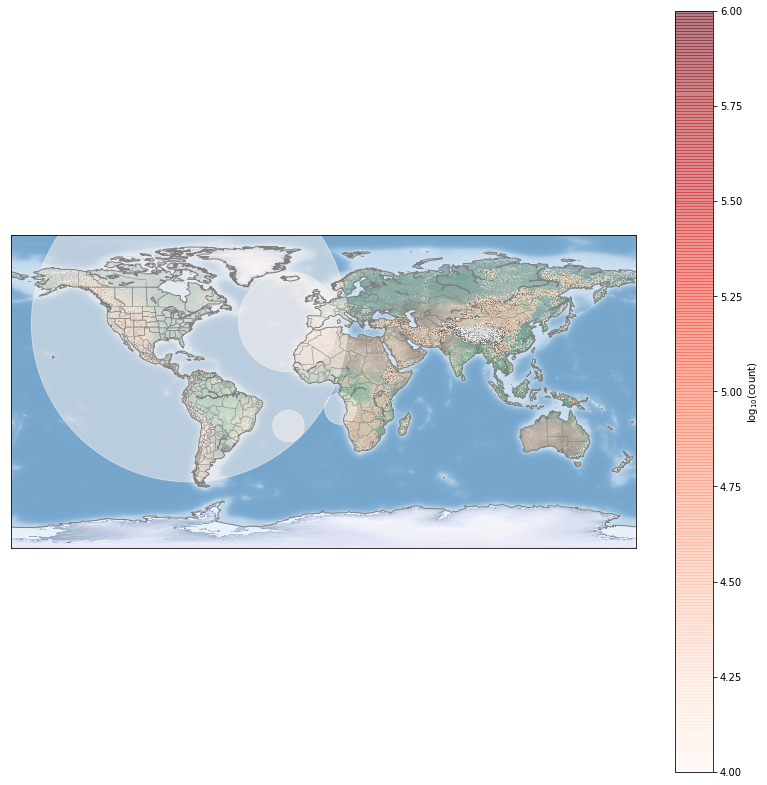

In [273]:
from collections import Counter
import matplotlib.pyplot as plt
import matplotlib.cm
 
from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from matplotlib.colors import Normalize

fig = plt.figure(figsize=(14, 14))
map = Basemap()
map.shadedrelief()
map.drawcoastlines(color='gray')
map.drawcountries(color='gray')
map.drawstates(color='gray')

map.scatter(lon, lat, latlon=True,
          c=np.log10(population), s=area,
          cmap='Reds', alpha=0.5)

plt.colorbar(label=r'$\log_{10}({\rm count})$')
plt.clim(4, 6)
plt.show()


In [258]:
print nationCount

 United-States                 29170
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 